## Model simulation: Force balance of an harmonic oscillator

$$\dot{x_1}=\frac{dx_1}{dt}= x_2$$

$$\dot{x_2}=\frac{dx_2}{dt}= -\frac{b}{m}x_2 -\frac{k}{m}x_1 + F_{ex}$$

with $x_1=x, x_2=\frac{dx}{dt}$

In [1]:
%matplotlib inline

# Importing functionalities
import numpy as np
import scipy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import Image
from ipywidgets import interact, fixed, FloatSlider, IntSlider, ToggleButtons

%load_ext autoreload
%autoreload 1
import sys
import os
sys.path.append("functions")
%aimport general_functions


In [2]:
%aimport force
function_derivatives = force.model_derivatives

## Model simulation

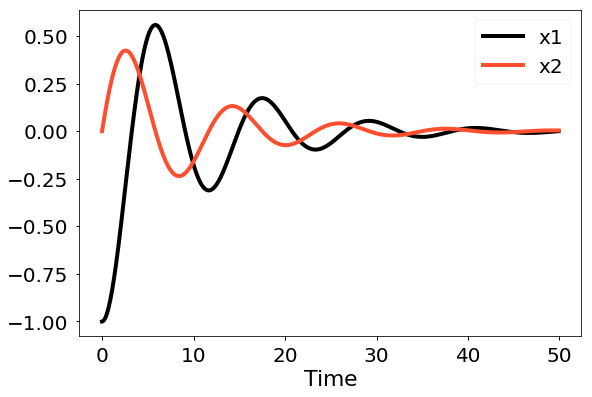

In [3]:
df = general_functions.model(
    np.arange(0, 50, 0.1), # Timesteps
    [-1, 0], # Initial conditions
    ['x1','x2'], # Variable names
   function_derivatives, # Function derivatives
    returnDataFrame=True, plotresults=True,
    # Specify parameter values
    b=0.2, m=1, k=0.3, Fex=0.)

$$\dot{x_1}=\frac{dx_1}{dt}= x_2$$

$$\dot{x_2}=\frac{dx_2}{dt}= -\frac{b}{m}x_2 -\frac{k}{m}x_1 + F_{ex}$$

## Impact of initial conditions and inputs

In [4]:
def interactive_model(x1, x2):
    general_functions.model(
        np.arange(0, 50, 0.1), # Timesteps
        [x1, x2], # Initial conditions
        ['x1','x2'], # Variable names
        function_derivatives, # Function derivatives
        returnDataFrame=False, plotresults=True,
        # Specify parameter values
        b=0.2, m=1, k=0.3, Fex=0.)
interact(interactive_model,
         x1=FloatSlider(value=-1, min=-10, max=10, step=1, description='x1', continuous_update=False),
         x2=FloatSlider(value=0, min=-10, max=10, step=1, description='x2', continuous_update=False));

interactive(children=(FloatSlider(value=-1.0, continuous_update=False, description='x1', max=10.0, min=-10.0, …

$$\dot{x_1}=\frac{dx_1}{dt}= x_2$$

$$\dot{x_2}=\frac{dx_2}{dt}= -\frac{b}{m}x_2 -\frac{k}{m}x_1 + F_{ex}$$

## Impact of model parameters

In [5]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0., 50, 0.1)),
         init=fixed([0.6, -0.4]), varnames=fixed([r'$x_1$',r'$x_2$']),
         f=fixed(function_derivatives),
         returnDataFrame=fixed(False), plotresults=fixed(True),twinax=fixed(False),
         b=FloatSlider(value=0.2, min=0., max=0.5, step=0.01, name='b', continuous_update=False),
         m=FloatSlider(value=1, min=0., max=5., step=0.1, name='m', continuous_update=False),
         k=FloatSlider(value=0.3, min=0., max=2., step=0.1, name='k', continuous_update=False),
         Fex=FloatSlider(value=0, min=0., max=2., step=0.05, name='Fex', continuous_update=False));
         #Fex=fixed(0));

interactive(children=(FloatSlider(value=0.2, continuous_update=False, description='b', max=0.5, step=0.01), Fl…

$$\dot{x_1}=\frac{dx_1}{dt}= x_2$$

$$\dot{x_2}=\frac{dx_2}{dt}= -\frac{b}{m}x_2 -\frac{k}{m}x_1 + F_{ex}$$

# Sensitivity Analysis

In [6]:
interact(general_functions.sensitivity,
    timesteps=fixed(np.arange(0, 50, 0.1)), # Timesteps
    init = fixed([-1, 0]), # Initial conditions
    varnames = fixed(['x1','x2']), # Variable names
    f = fixed(function_derivatives), # Function derivatives
    parametername=ToggleButtons(options=['b', 'm', 'k', 'Fex']),
    log_perturbation = IntSlider(value=-4, min=-15, max=-1, step=1, continuous_update=False),
    sort=ToggleButtons(options=[
            'absolute sensitivity', 'relative sensitivity parameter',
            'relative sensitivity variable','relative total sensitivity']),
    # Specify parameter values
    b=fixed(0.2), m=fixed(1), k=fixed(0.3), Fex=fixed(0.));

interactive(children=(ToggleButtons(description='parametername', options=('b', 'm', 'k', 'Fex'), value='b'), I…

### State trajectory 

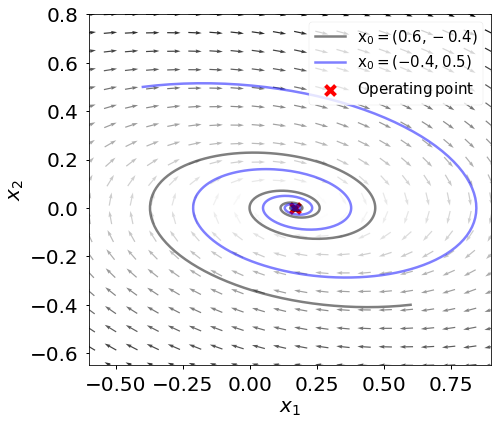

In [16]:
from scipy import integrate
def model_derivatives(variables, t, m,b,k,Fex):

    x1 = variables[0]
    x2 = variables[1]

    dx1dt = x2
    dx2dt = -b/m*x2 - k/m*x1 + Fex
    return [dx1dt, dx2dt]
# Model parameters
m=1
b=0.2
k=0.3
Fex=0.05
init=[0.6,-0.4]
init2=[-0.4,0.5]
# Define operating point f(x1,x2)=0
EQ = ([Fex/k,0])
# Define n number of trajectories ranging from n1 to n2
values = np.arange(1,1,1)

fig, ax1 = plt.subplots(figsize=(6.5,5.5)) 
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
timesteps = np.arange(0, 50, 0.1)
params=(m,b,k,Fex)
P = integrate.odeint(model_derivatives, init, timesteps, args=params)
ax1.plot( P[:,0], P[:,1],color='k',lw=2.5, label=r'$\mathrm{x_0=(0.6,-0.4)}$',alpha=0.5)

P2 = integrate.odeint(model_derivatives, init2, timesteps, args=params)
ax1.plot( P2[:,0], P2[:,1],color='b',lw=2.5, label=r'$\mathrm{x_0=(-0.4,0.5)}$',alpha=0.5)
ax1.scatter(EQ[0],EQ[1],s=100, marker='x',color='r',alpha=1,label=r'$\mathrm{Operating\/point}$')
# Define ranges
xmin,ymin = -0.6,-0.65
xmax,ymax = 0.9, 0.8
# Define number of points
nb_points = 20
# Define x and y ranges
x = np.linspace(xmin, xmax, nb_points)
y = np.linspace(ymin, ymax, nb_points)
# Create meshgrid
X1 , Y1 = np.meshgrid(x,y)
# Calculate growth rate at each grid point
DX1, DY1 = function_derivatives([X1,Y1], timesteps,{'b':b,'m':m,'k':k,'Fex':Fex} )
# Direction at each grid point is the hypotenuse of the x1 and x2 directions
M = (np.hypot(DX1, DY1))
M[ M == 0] = 1.
DX1 = DX1/M
DY1 = DY1/M


#plt.title('Trajectories and direction fields')
Q = ax1.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap='gray_r',scale=30)
ax1.set_xlabel(r'$x_1$', fontsize=20)
ax1.set_ylabel(r'$x_2$', fontsize=20)
ax1.legend(loc=1,fontsize=15)
#ax1.grid()
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
plt.savefig(os.path.join(r"C:\Users\David\Desktop\Postdoc stuff\teaching_postoc_ModSim",'trajectory.svg'), bbox_inches='tight')
plt.show()

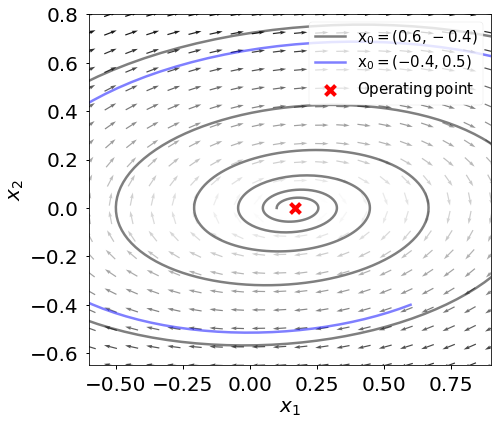

In [18]:
m=1
b=-0.1
k=0.3
Fex=0.05
init=[0.1,0]
init2=[0.6,-0.4]
# Define operating point f(x1,x2)=0
EQ = ([Fex/k,0])
# Define n number of trajectories ranging from n1 to n2
values = np.arange(1,1,1)

fig, ax1 = plt.subplots(figsize=(6.5,5.5)) 
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
timesteps = np.arange(0, 100, 0.1)
params=(m,b,k,Fex)
P = integrate.odeint(model_derivatives, init, timesteps, args=params)
ax1.plot( P[:,0], P[:,1],color='k',lw=2.5, label=r'$\mathrm{x_0=(0.6,-0.4)}$',alpha=0.5)

P2 = integrate.odeint(model_derivatives, init2, timesteps, args=params)
ax1.plot( P2[:,0], P2[:,1],color='b',lw=2.5, label=r'$\mathrm{x_0=(-0.4,0.5)}$',alpha=0.5)
ax1.scatter(EQ[0],EQ[1],s=100, marker='x',color='r',alpha=1,label=r'$\mathrm{Operating\/point}$')
# Define ranges
xmin,ymin = -0.6,-0.65
xmax,ymax = 0.9, 0.8
# Define number of points
nb_points = 20
# Define x and y ranges
x = np.linspace(xmin, xmax, nb_points)
y = np.linspace(ymin, ymax, nb_points)
# Create meshgrid
X1 , Y1 = np.meshgrid(x,y)
# Calculate growth rate at each grid point
DX1, DY1 = function_derivatives([X1,Y1], timesteps,{'b':b,'m':m,'k':k,'Fex':Fex} )
# Direction at each grid point is the hypotenuse of the x1 and x2 directions
M = (np.hypot(DX1, DY1))
M[ M == 0] = 1.
DX1 = DX1/M
DY1 = DY1/M

#cm = plt.cm.gray
#sm = plt.cm.ScalarMappable(cmap=cm)
#sm.set_array([])
#plt.title('Trajectories and direction fields')
Q = ax1.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap='gray_r',scale=30)
ax1.set_xlabel(r'$x_1$', fontsize=20)
ax1.set_ylabel(r'$x_2$', fontsize=20)
ax1.legend(loc=1,fontsize=15)
#ax1.grid()
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
#plt.colorbar(sm)
plt.savefig(os.path.join(r"C:\Users\David\Desktop\Postdoc stuff\teaching_postoc_ModSim",'trajectory_unstable.svg'), bbox_inches='tight')
plt.show()